# Project1

- Your analysis here
  
---

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



In [2]:
dog_data = pd.read_csv("Datasets/merged_dog_data.csv")
dog_data = dog_data.drop_duplicates(subset=['id'])
dog_data.count()

Unnamed: 0                  7934
id                          7934
organization_id             7934
organization_id.1           7934
url                         7934
species                     7934
age                         7934
gender                      7934
size                        7934
coat                        2835
tags                        7934
name                        7934
description                 6660
organization_animal_id      4504
photos                      7934
status                      7934
status_changed_at           7934
published_at                7934
distance                    7934
breeds.primary              7934
breeds.secondary            3030
breeds.mixed                7934
breeds.unknown              7934
colors.primary              3469
colors.secondary            1838
colors.tertiary              202
attributes.special_needs    7934
attributes.shots_current    7934
environment.children        3100
environment.dogs            4084
environmen

In [3]:
adoptable = dog_data[dog_data["status"] == "adoptable"]
adoptable.count()


Unnamed: 0                  3999
id                          3999
organization_id             3999
organization_id.1           3999
url                         3999
species                     3999
age                         3999
gender                      3999
size                        3999
coat                        1748
tags                        3999
name                        3999
description                 3549
organization_animal_id      1905
photos                      3999
status                      3999
status_changed_at           3999
published_at                3999
distance                    3999
breeds.primary              3999
breeds.secondary            1731
breeds.mixed                3999
breeds.unknown              3999
colors.primary              2325
colors.secondary            1226
colors.tertiary              123
attributes.special_needs    3999
attributes.shots_current    3999
environment.children        1528
environment.dogs            2141
environmen

In [4]:
adopted = dog_data[dog_data["status"] == "adopted"]
adopted.count()

Unnamed: 0                  3935
id                          3935
organization_id             3935
organization_id.1           3935
url                         3935
species                     3935
age                         3935
gender                      3935
size                        3935
coat                        1087
tags                        3935
name                        3935
description                 3111
organization_animal_id      2599
photos                      3935
status                      3935
status_changed_at           3935
published_at                3935
distance                    3935
breeds.primary              3935
breeds.secondary            1299
breeds.mixed                3935
breeds.unknown              3935
colors.primary              1144
colors.secondary             612
colors.tertiary               79
attributes.special_needs    3935
attributes.shots_current    3935
environment.children        1572
environment.dogs            1943
environmen

In [5]:
adoptable_age = adoptable.groupby("age").count()
adoptable_age = adoptable_age["id"]
adoptable_age_df = pd.DataFrame(adoptable_age)
adoptable_age_df.reset_index(inplace=True)
adoptable_age_df['% Total'] = adoptable_age_df['id'] / len(adoptable)
adoptable_age_df

,age,id,% Total
0,Adult,1593,0.398350
1,Baby,1211,0.302826
2,Senior,238,0.059515
3,Young,957,0.239310


In [6]:
adopted_age = adopted.groupby("age").count()
adopted_age = adopted_age["id"]
adopted_age_df = pd.DataFrame(adopted_age)
adopted_age_df.reset_index(inplace=True)
adopted_age_df['% Total'] = adopted_age_df['id'] / len(adopted)
adopted_age_df

,age,id,% Total
0,Adult,1892,0.480813
1,Baby,825,0.209657
2,Senior,390,0.099111
3,Young,828,0.210419


<BarContainer object of 4 artists>

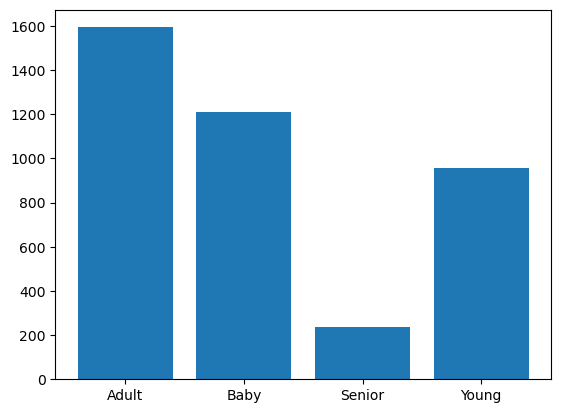

In [7]:
plt.bar(adoptable_age_df["age"], adoptable_age_df["id"], label="Adoptable")


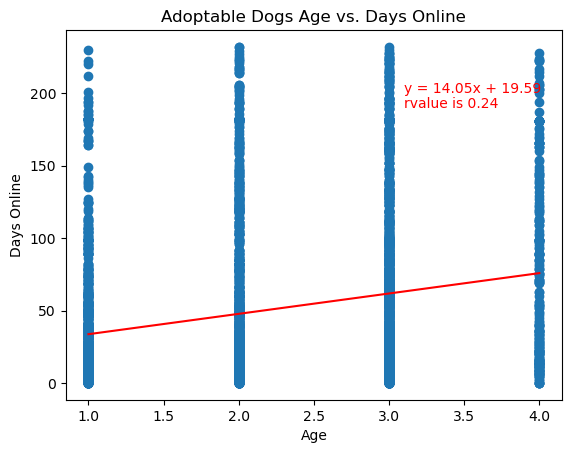

In [8]:
value_mapping_age = {'Baby': 1, 'Young': 2, 'Adult': 3, 'Senior': 4}
adoptable_age_corr = adoptable.copy()
# Replace values in the 'Category' column using the mapping
adoptable_age_corr['age'] = adoptable_age_corr['age'].replace(value_mapping_age)
adoptable_age_corr = adoptable_age_corr.sort_values(by='age')


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adoptable_age_corr['age'], adoptable_age_corr['adoptable_days_online'])
regress_values = adoptable_age_corr['age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adoptable_age_corr['age'],adoptable_age_corr['adoptable_days_online'])
plt.plot(adoptable_age_corr['age'],regress_values,"r-")
plt.annotate(line_eq,(3.1,200),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,190),fontsize=10,color="red")
plt.xlabel('Age')
plt.ylabel('Days Online')
plt.title('Adoptable Dogs Age vs. Days Online')

plt.show()

<BarContainer object of 4 artists>

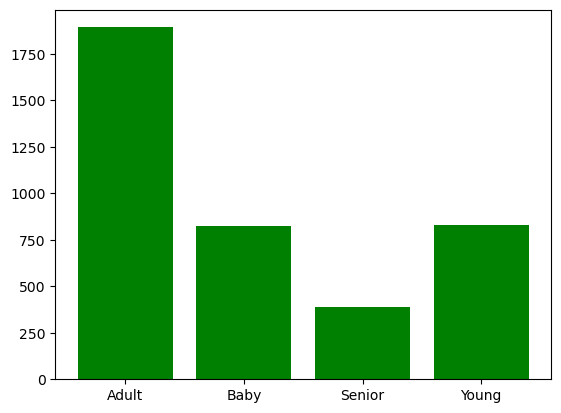

In [9]:

plt.bar(adopted_age_df["age"], adopted_age_df["id"], label="Adopted", color= "green")

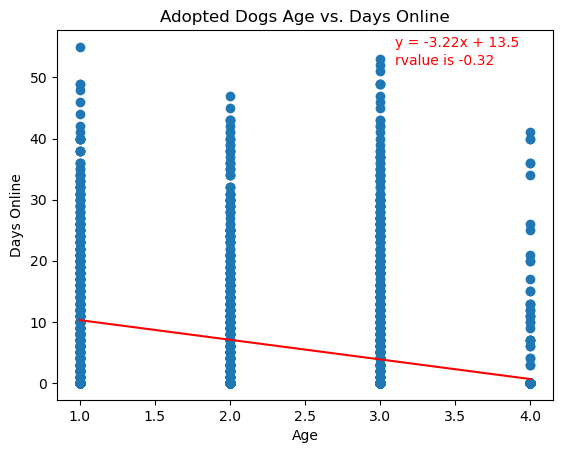

In [10]:
value_mapping_age = {'Baby': 1, 'Young': 2, 'Adult': 3, 'Senior': 4}
adopted_age_corr = adopted.copy()
# Replace values in the 'Category' column using the mapping
adopted_age_corr['age'] = adopted_age_corr['age'].replace(value_mapping_age)
adopted_age_corr = adopted_age_corr.sort_values(by='age')


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adopted_age_corr['age'], adopted_age_corr['days_on_petfinder'])
regress_values = adopted_age_corr['age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adopted_age_corr['age'],adopted_age_corr['days_on_petfinder'])
plt.plot(adopted_age_corr['age'],regress_values,"r-")
plt.annotate(line_eq,(3.1,55),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,52),fontsize=10,color="red")
plt.xlabel('Age')
plt.ylabel('Days Online')
plt.title('Adopted Dogs Age vs. Days Online')

plt.show()

In [11]:
adoptable_breed = adoptable.groupby("breeds.primary").count()
adoptable_breed = adoptable_breed["id"]
adoptable_breed_df = pd.DataFrame(adoptable_breed)
adoptable_breed_df.reset_index(inplace=True)
adoptable_breed_df['% Total'] = adoptable_breed_df['id'] / len(adoptable)
adoptable_breed_df = adoptable_breed_df.sort_values(by='id', ascending=False)
adoptable_breed_df

,breeds.primary,id,% Total
107,Pit Bull Terrier,537,0.134284
96,Mixed Breed,461,0.115279
87,Labrador Retriever,310,0.077519
40,Chihuahua,190,0.047512
70,German Shepherd Dog,178,0.044511
...,...,...,...
106,Petit Basset Griffon Vendeen,1,0.000250
57,English Cocker Spaniel,1,0.000250
64,Field Spaniel,1,0.000250
113,Presa Canario,1,0.000250


In [12]:
adopted_breed = adopted.groupby("breeds.primary").count()
adopted_breed = adopted_breed["id"]
adopted_breed_df = pd.DataFrame(adopted_breed)
adopted_breed_df.reset_index(inplace=True)
adopted_breed_df['% Total'] = adopted_breed_df['id'] / len(adopted)
adopted_breed_df = adopted_breed_df.sort_values(by='id', ascending=False)
adopted_breed_df


,breeds.primary,id,% Total
88,Labrador Retriever,394,0.100127
46,Chihuahua,335,0.085133
99,Mixed Breed,245,0.062262
141,Terrier,217,0.055146
71,German Shepherd Dog,174,0.044219
...,...,...,...
119,Redbone Coonhound,1,0.000254
66,Finnish Spitz,1,0.000254
65,Feist,1,0.000254
126,Scottish Terrier,1,0.000254


In [13]:
test_adoptable_breed = adoptable_breed_df["id"]
test_adopted_breed = adopted_breed_df["id"]

stats.ttest_ind(test_adoptable_breed, test_adopted_breed, equal_var=False)


TtestResult(statistic=0.13004516115025302, pvalue=0.8966199589003212, df=292.90638157655286)

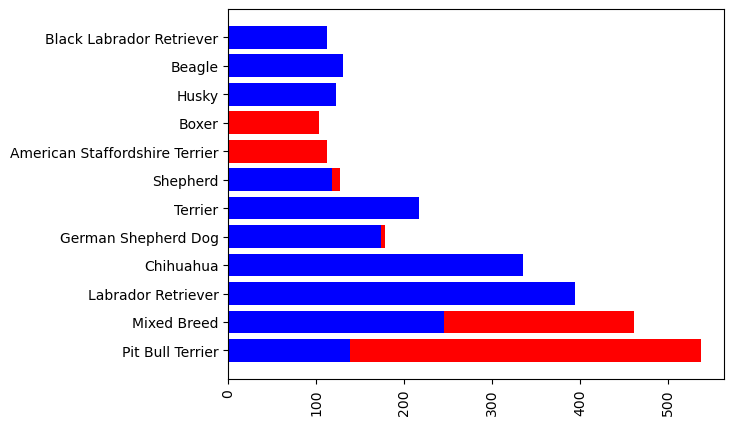

In [14]:
adoptable_breed_plot = adoptable_breed_df[["breeds.primary", "id"]][:10]
adopted_breed_plot = adopted_breed_df[["breeds.primary", "id"]][:10]

# plt.subplot(2, 1, 2)
# plt.bar(adoptable_breed_plot, [20] * len(adoptable_breed_data), density=True, alpha=0.7, label="adoptable_breed")
# plt.bar(adopted_breed_plot, [20] * len(adopted_breed_data), density=True, alpha=0.7, label="adopted_breed")
# # plt.axvline(adoptable_breed_plot.mean(), color='k', linestyle='dashed', linewidth=1)
# # plt.axvline(adopted_breed_plot.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.xlabel("Breed")
# plt.ylabel("Count")
# plt.legend()
# plt.show()

plt.barh(adoptable_breed_plot["breeds.primary"], adoptable_breed_plot["id"], label="Adoptable", color ="red")
plt.barh(adopted_breed_plot["breeds.primary"], adopted_breed_plot["id"], label="Adopted", color = "blue")
plt.xticks(rotation=90)
plt.show()


In [15]:
adoptable_color = adoptable.groupby("colors.primary").count()
adoptable_color = adoptable_color["id"]
adoptable_color_df = pd.DataFrame(adoptable_color)
adoptable_color_df.reset_index(inplace=True)
adoptable_color_df['% Total'] = adoptable_color_df['id'] / len(adoptable)
adoptable_color_df = adoptable_color_df.sort_values(by='id', ascending=False)
adoptable_color_df

,colors.primary,id,% Total
2,Black,623,0.155789
13,White / Cream,411,0.102776
14,Yellow / Tan / Blond / Fawn,242,0.060515
4,Brown / Chocolate,221,0.055264
3,Brindle,172,0.043011
12,"Tricolor (Brown, Black, & White)",132,0.033008
6,Gray / Blue / Silver,123,0.030758
10,Red / Chestnut / Orange,115,0.028757
0,Apricot / Beige,104,0.026007
1,Bicolor,102,0.025506


In [16]:
adopted_color = adopted.groupby("colors.primary").count()
adopted_color = adopted_color["id"]
adopted_color_df = pd.DataFrame(adopted_color)
adopted_color_df.reset_index(inplace=True)
adopted_color_df['% Total'] = adopted_color_df['id'] / len(adopted)
adopted_color_df = adopted_color_df.sort_values(by='id', ascending=False)
adopted_color_df

,colors.primary,id,% Total
2,Black,297,0.075476
13,White / Cream,177,0.044981
12,"Tricolor (Brown, Black, & White)",116,0.029479
14,Yellow / Tan / Blond / Fawn,116,0.029479
4,Brown / Chocolate,80,0.020330
0,Apricot / Beige,68,0.017281
10,Red / Chestnut / Orange,63,0.016010
3,Brindle,56,0.014231
1,Bicolor,53,0.013469
6,Gray / Blue / Silver,45,0.011436


In [17]:
test_adoptable_color = adoptable_color_df["id"]
test_adopted_color = adopted_color_df["id"]

stats.ttest_ind(test_adoptable_color, test_adopted_color, equal_var=False)

TtestResult(statistic=1.6342883011557583, pvalue=0.1181561385195702, df=19.60289355150065)

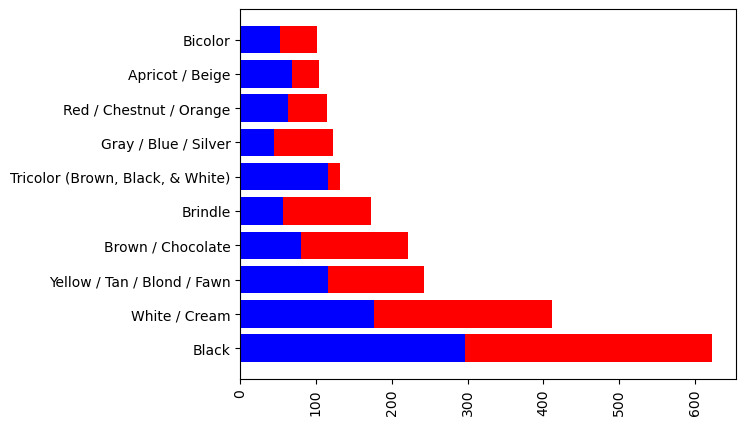

In [18]:
adoptable_color_plot = adoptable_color_df[["colors.primary", "id"]][:10]
adopted_color_plot = adopted_color_df[["colors.primary", "id"]][:10]

plt.barh(adoptable_color_plot["colors.primary"], adoptable_color_plot["id"], label="Adoptable", color ="red")
plt.barh(adopted_color_plot["colors.primary"], adopted_color_plot["id"], label="Adopted", color = "blue")
plt.xticks(rotation=90)
plt.show()

In [19]:
adoptable_tags = adoptable.groupby("tags").count()
adoptable_tags = adoptable_tags["id"]
adoptable_tags_df = pd.DataFrame(adoptable_tags)
adoptable_tags_df.reset_index(inplace=True)
adoptable_tags_df['% Total'] = adoptable_tags_df['id'] / len(adoptable)
adoptable_tags_df = adoptable_tags_df.sort_values(by='id', ascending=False)
adoptable_tags_df

,tags,id,% Total
1067,[],2475,0.618905
665,"['Friendly', 'Affectionate']",60,0.015004
642,"['Friendly', 'Affectionate', 'Playful']",31,0.007752
893,"['Friendly', 'Playful']",16,0.004001
547,"['Friendly', 'Affectionate', 'Playful', 'Funny...",15,0.003751
...,...,...,...
379,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
380,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
382,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
383,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250


In [20]:
adopted_tags = adopted.groupby("tags").count()
adopted_tags = adopted_tags["id"]
adopted_tags_df = pd.DataFrame(adopted_tags)
adopted_tags_df.reset_index(inplace=True)
adopted_tags_df['% Total'] = adopted_tags_df['id'] / len(adopted)
adopted_tags_df = adopted_tags_df.sort_values(by='id', ascending=False)
adopted_tags_df

,tags,id,% Total
428,[],3247,0.825159
297,"['Friendly', 'Affectionate']",49,0.012452
285,"['Friendly', 'Affectionate', 'Playful']",30,0.007624
116,"['Friendly', 'Affectionate', 'Gentle']",14,0.003558
338,"['Friendly', 'Loyal', 'Playful', 'Smart', 'Cur...",12,0.003050
...,...,...,...
147,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
146,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
145,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
144,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254


In [21]:
adoptable_size = adoptable.groupby("size").count()
adoptable_size = adoptable_size["id"]
adoptable_size_df = pd.DataFrame(adoptable_size)
adoptable_size_df.reset_index(inplace=True)
adoptable_size_df['% Total'] = adoptable_size_df['id'] / len(adoptable)
adoptable_size_df = adoptable_size_df.sort_values(by='id', ascending=False)
adoptable_size_df

,size,id,% Total
2,Medium,1864,0.466117
1,Large,1378,0.344586
3,Small,720,0.180045
0,Extra Large,37,0.009252


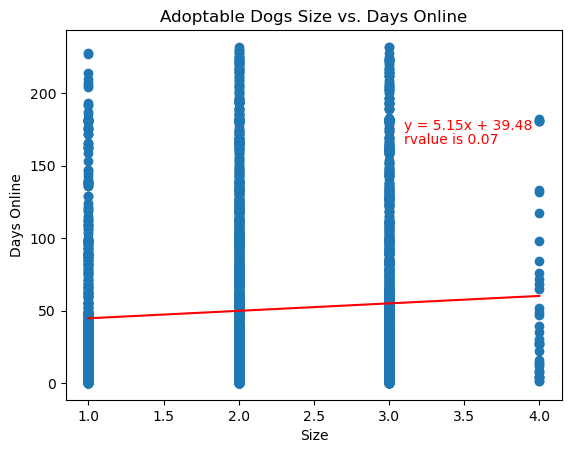

In [22]:

value_mapping_size = {'Small': 1, 'Medium': 2, 'Large': 3, 'Extra Large': 4}
adoptable_size_corr = adoptable.copy()
# Replace values in the 'Category' column using the mapping
adoptable_size_corr['size'] = adoptable_size_corr['size'].replace(value_mapping_size)
adoptable_size_corr = adoptable_size_corr.sort_values(by='size')


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adoptable_size_corr['size'], adoptable_size_corr['adoptable_days_online'])
regress_values = adoptable_size_corr['size'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adoptable_size_corr['size'],adoptable_size_corr['adoptable_days_online'])
plt.plot(adoptable_size_corr['size'],regress_values,"r-")
plt.annotate(line_eq,(3.1,175),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,165),fontsize=10,color="red")
plt.xlabel('Size')
plt.ylabel('Days Online')
plt.title('Adoptable Dogs Size vs. Days Online')

plt.show()


In [23]:
adopted_size = adopted.groupby("size").count()
adopted_size = adopted_size["id"]
adopted_size_df = pd.DataFrame(adopted_size)
adopted_size_df.reset_index(inplace=True)
adopted_size_df['% Total'] = adopted_size_df['id'] / len(adopted)
adopted_size_df = adopted_size_df.sort_values(by='id', ascending=False)
adopted_size_df

,size,id,% Total
2,Medium,2078,0.528081
3,Small,987,0.250826
1,Large,841,0.213723
0,Extra Large,29,0.007370


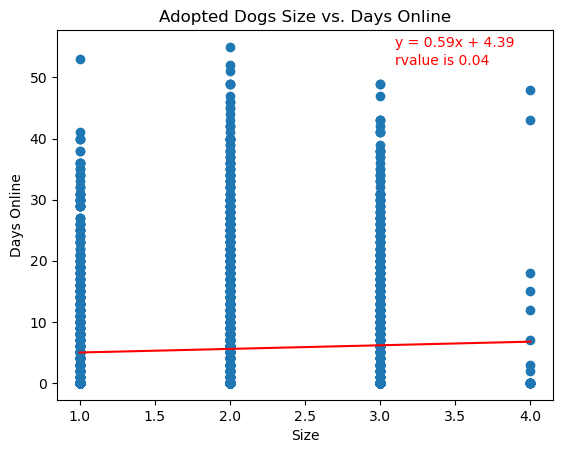

In [24]:
value_mapping_size = {'Small': 1, 'Medium': 2, 'Large': 3, 'Extra Large': 4}
adopted_size_corr = adopted.copy()
# Replace values in the 'Category' column using the mapping
adopted_size_corr['size'] = adopted_size_corr['size'].replace(value_mapping_size)
adopted_size_corr = adopted_size_corr.sort_values(by='size')


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adopted_size_corr['size'], adopted_size_corr['days_on_petfinder'])
regress_values = adopted_size_corr['size'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adopted_size_corr['size'],adopted_size_corr['days_on_petfinder'])
plt.plot(adopted_size_corr['size'],regress_values,"r-")
plt.annotate(line_eq,(3.1,55),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,52),fontsize=10,color="red")
plt.xlabel('Size')
plt.ylabel('Days Online')
plt.title('Adopted Dogs Size vs. Days Online')

plt.show()


In [25]:
adoptable_gender = adoptable.groupby("gender").count()
adoptable_gender = adoptable_gender["id"]
adoptable_gender_df = pd.DataFrame(adoptable_gender)
adoptable_gender_df.reset_index(inplace=True)
adoptable_gender_df['% Total'] = adoptable_gender_df['id'] / len(adoptable)
adoptable_gender_df


,gender,id,% Total
0,Female,1980,0.495124
1,Male,2019,0.504876


In [26]:
adopted_gender = adopted.groupby("gender").count()
adopted_gender = adopted_gender["id"]
adopted_gender_df = pd.DataFrame(adopted_gender)
adopted_gender_df.reset_index(inplace=True)
adopted_gender_df['% Total'] = adopted_gender_df['id'] / len(adopted)
adopted_gender_df


,gender,id,% Total
0,Female,1831,0.465311
1,Male,2104,0.534689


In [27]:
test_adoptable = adoptable_gender_df["id"]
test_adopted = adopted_gender_df["id"]

stats.ttest_ind(test_adoptable, test_adopted, equal_var=False)

TtestResult(statistic=0.23207607177404635, pvalue=0.8536666938320401, df=1.0407993338884263)

In [28]:
adoptable_color_days = adoptable.groupby('colors.primary')['adoptable_days_online'].mean()

adoptable_count = adoptable.groupby('colors.primary')['id'].count()
adoptable_color_days_df = pd.concat([adoptable_color_days, adoptable_count], axis=1)

adoptable_color_days_df.reset_index(inplace=True)
adoptable_color_days_df = adoptable_color_days_df.sort_values(by='id', ascending=False)

adoptable_color_days_df


,colors.primary,adoptable_days_online,id
2,Black,50.470305,623
13,White / Cream,44.462287,411
14,Yellow / Tan / Blond / Fawn,51.636364,242
4,Brown / Chocolate,58.031674,221
3,Brindle,56.139535,172
12,"Tricolor (Brown, Black, & White)",47.477273,132
6,Gray / Blue / Silver,58.341463,123
10,Red / Chestnut / Orange,59.156522,115
0,Apricot / Beige,48.990385,104
1,Bicolor,46.696078,102


In [29]:
adopted_color_days = adopted.groupby('colors.primary')['days_on_petfinder'].mean()

adopted_count = adopted.groupby('colors.primary')['id'].count()
adopted_color_days_df = pd.concat([adopted_color_days, adopted_count], axis=1)

adopted_color_days_df.reset_index(inplace=True)
adopted_color_days_df = adopted_color_days_df.sort_values(by='id', ascending=False)

adopted_color_days_df

,colors.primary,days_on_petfinder,id
2,Black,12.835017,297
13,White / Cream,13.197740,177
12,"Tricolor (Brown, Black, & White)",12.991379,116
14,Yellow / Tan / Blond / Fawn,12.370690,116
4,Brown / Chocolate,11.612500,80
0,Apricot / Beige,9.382353,68
10,Red / Chestnut / Orange,13.714286,63
3,Brindle,13.482143,56
1,Bicolor,13.490566,53
6,Gray / Blue / Silver,12.711111,45


In [30]:
adoptable_breed_days = adoptable.groupby('breeds.primary')['adoptable_days_online'].mean()

adoptable_count2 = adoptable.groupby('breeds.primary')['id'].count()
adoptable_breed_days_df = pd.concat([adoptable_breed_days, adoptable_count2], axis=1)

adoptable_breed_days_df.reset_index(inplace=True)
adoptable_breed_days_df = adoptable_breed_days_df.sort_values(by='id', ascending=False)

adoptable_breed_days_df


,breeds.primary,adoptable_days_online,id
107,Pit Bull Terrier,61.415270,537
96,Mixed Breed,58.648590,461
87,Labrador Retriever,45.735484,310
40,Chihuahua,51.794737,190
70,German Shepherd Dog,49.258427,178
...,...,...,...
106,Petit Basset Griffon Vendeen,5.000000,1
57,English Cocker Spaniel,46.000000,1
64,Field Spaniel,107.000000,1
113,Presa Canario,11.000000,1


In [41]:
adopted_breed_days = adopted.groupby('breeds.primary')['days_on_petfinder'].mean()

adopted_count2 = adopted.groupby('breeds.primary')['id'].count()
adopted_breed_days_df = pd.concat([adopted_breed_days, adopted_count2], axis=1)

adopted_breed_days_df.reset_index(inplace=True)
adopted_breed_days_df = adopted_breed_days_df.sort_values(by='id', ascending=False)

adopted_breed_days_df

,breeds.primary,days_on_petfinder,id
88,Labrador Retriever,4.538071,394
46,Chihuahua,3.367164,335
99,Mixed Breed,8.142857,245
141,Terrier,3.857143,217
71,German Shepherd Dog,5.672414,174
...,...,...,...
119,Redbone Coonhound,22.000000,1
66,Finnish Spitz,6.000000,1
65,Feist,5.000000,1
126,Scottish Terrier,0.000000,1
